In [1]:
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as ptc
import pandas as pd
import math
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import PIL
import warnings
import seaborn as sns
import statsmodels.api
warnings.filterwarnings('ignore')
%load_ext watermark
%watermark --iversions

matplotlib  3.3.2
pandas      1.1.3
PIL         8.0.1
seaborn     0.11.0
PIL.Image   8.0.1
numpy       1.19.2
statsmodels 0.12.1



Author: Brian Seko

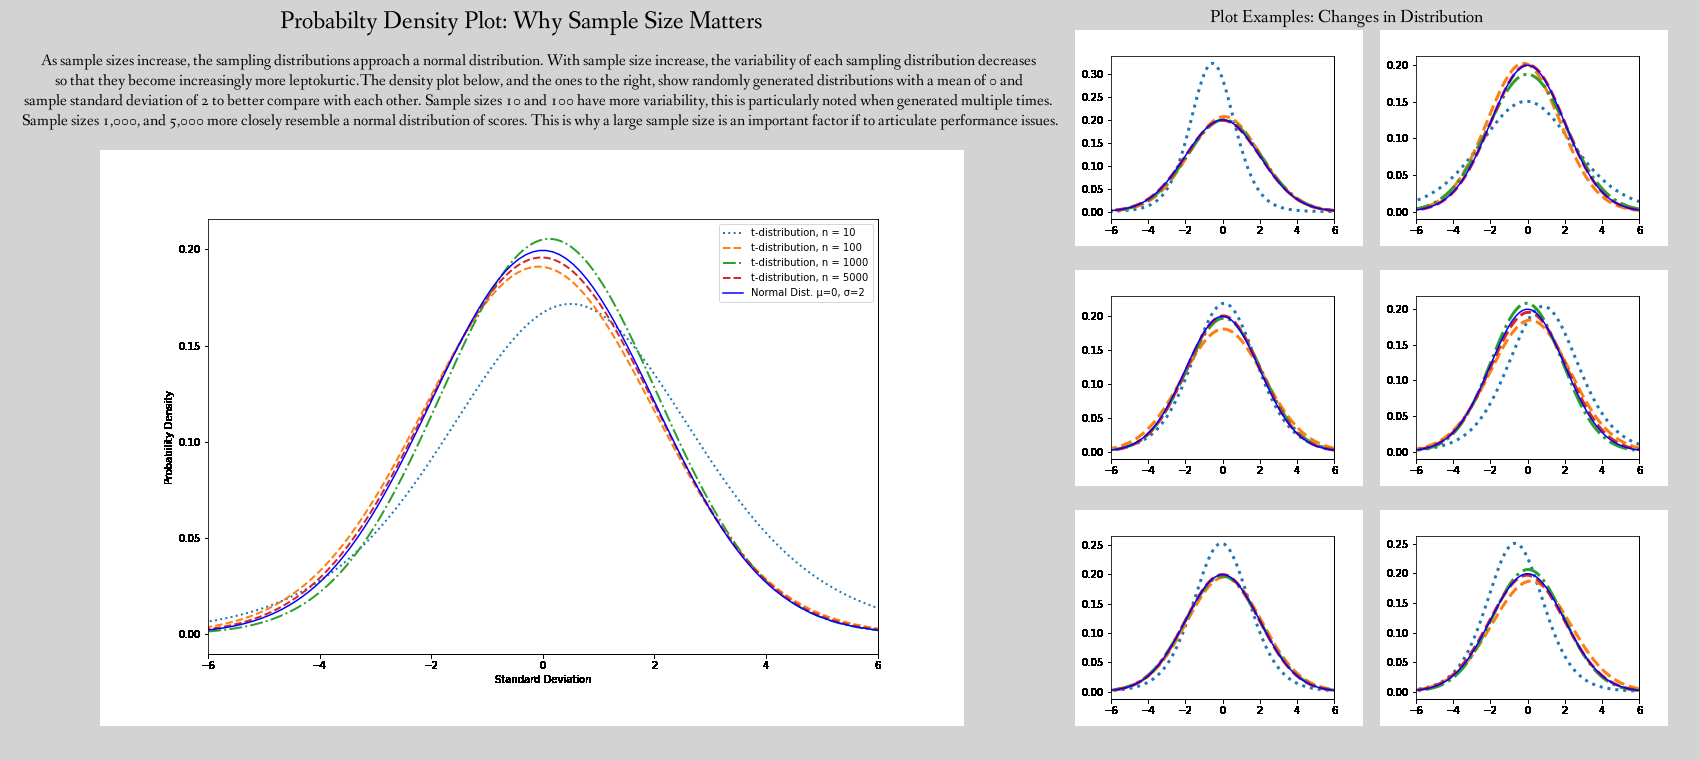

In [2]:
def make_prob_plot():
    def make_t_distribution(sample_size, mean, sd):
        t_sample = stats.t.rvs(sample_size - 1, mean, sd, sample_size) # Random t-distribution sample
        sample_mean = np.mean(t_sample) # sample mean
        sample_std = np.std(t_sample) # sample standard deviation
        t_dist = stats.t(df = sample_size - 1, loc = sample_mean, scale = sample_std) # make a t-distribution based on the sample
        x_axis = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 500) # Generate an x-axis based on t-quantile values

        return t_dist, x_axis

    def q1_graph():

        fig = plt.figure(figsize=(4,3))
        t_dist_10, x_axis_10 = make_t_distribution(10, 0,2)
        t_dist_100, x_axis_100 = make_t_distribution(100, 0,2)
        t_dist_1000, x_axis_1000 = make_t_distribution(1000, 0,2)
        t_dist_5000, x_axis_5000 = make_t_distribution(5000, 0,2)

        y_axis_10 = t_dist_10.pdf(x_axis_10)
        y_axis_100 = t_dist_100.pdf(x_axis_100)
        y_axis_1000 = t_dist_1000.pdf(x_axis_1000)
        y_axis_5000 = t_dist_5000.pdf(x_axis_5000)

        plt.plot(x_axis_10, y_axis_10,':',linewidth=3) #blue
        plt.plot(x_axis_100, y_axis_100,'--',linewidth=3) #yellow
        plt.plot(x_axis_1000, y_axis_1000,'-.',linewidth=3) #green
        plt.plot(x_axis_5000, y_axis_5000,'--',linewidth=3) #red

        mu = 0
        variance = 1
        sigma = 2
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'blue')

        plt.xlim(-6,6)
        plt.close()
        return fig

    def q1_graph_big():

        fig = plt.figure(figsize=(12,8))
        t_dist_10, x_axis_10 = make_t_distribution(10, 0,2)
        t_dist_100, x_axis_100 = make_t_distribution(100, 0,2)
        t_dist_1000, x_axis_1000 = make_t_distribution(1000, 0,2)
        t_dist_5000, x_axis_5000 = make_t_distribution(5000, 0,2)

        y_axis_10 = t_dist_10.pdf(x_axis_10)
        y_axis_100 = t_dist_100.pdf(x_axis_100)
        y_axis_1000 = t_dist_1000.pdf(x_axis_1000)
        y_axis_5000 = t_dist_5000.pdf(x_axis_5000)

        plt.plot(x_axis_10, y_axis_10,':',linewidth=2) #blue
        plt.plot(x_axis_100, y_axis_100,'--',linewidth=2) #yellow
        plt.plot(x_axis_1000, y_axis_1000,'-.',linewidth=2) #green
        plt.plot(x_axis_5000, y_axis_5000,'--',linewidth=2) #red

        mu = 0
        variance = 1
        sigma = 2
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'blue')

        plt.xlim(-6,6)
        plt.legend(x_axis_10, labels = ['t-distribution, n = 10', 't-distribution, n = 100','t-distribution, n = 1000','t-distribution, n = 5000', 'Normal Dist. μ=0, σ=2'])
        plt.xlabel('Standard Deviation')
        plt.ylabel('Probability Density')
        plt.close()
        return fig

    for x in range(6):
        q1_graph().savefig('q1_graph{}.png'.format(x))
    image_list = []
    for x in range(6):
        image = Image.open('q1_graph{}.png'.format(x)).convert('RGB')
        image_list.append(image)
    big = q1_graph_big().savefig('q1_graph_big.png')
    big_image = Image.open('q1_graph_big.png')

    #contact sheet
    contactsheet = Image.new('RGB', (1700,760),'#D3D3D3')

    contactsheet.paste(image_list[0],(1380,30))
    contactsheet.paste(image_list[1],(1075,30))
    contactsheet.paste(image_list[2],(1380,270))
    contactsheet.paste(image_list[3],(1075,270))
    contactsheet.paste(image_list[4],(1380,510))
    contactsheet.paste(image_list[5],(1075,510))
    contactsheet.paste(big_image,(100,150))

    draw = ImageDraw.Draw(contactsheet)
    text = 'Probabilty Density Plot: Why Sample Size Matters'
    f = ImageFont.truetype('fanwood-webfont.ttf',25)
    f2 = ImageFont.truetype('fanwood-webfont.ttf',18)
    f3 = ImageFont.truetype('fanwood-webfont.ttf',16)
    draw.text((280, 5), text, font = f, fill = 'black') 
    draw.text((1210,5), 'Plot Examples: Changes in Distribution', font = f2, fill = 'black')
    text2 = """
    As sample sizes increase, the sampling distributions approach a normal distribution. With sample size increase, the variability of each sampling distribution decreases 
    so that they become increasingly more leptokurtic.The density plot below, and the ones to the right, show randomly generated distributions with a mean of 0 and 
    sample standard deviation of 2 to better compare with each other. Sample sizes 10 and 100 have more variability, this is particularly noted when generated multiple times. 
    Sample sizes 1,000, and 5,000 more closely resemble a normal distribution of scores. This is why a large sample size is an important factor if to articulate performance issues.
    """
    draw.text((10, 30), text2, font = f3, fill='black', align = 'center')

    return contactsheet

make_prob_plot()

In [3]:
def grade_distribution():
    class_scores = pd.read_csv('assets/class_grades.csv')

    grades = pd.DataFrame.from_dict({'grade':['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','E'], 'gpa':[4.3,4,3.7,3.3,3,2.7,2.3,2,1.7,1.3,1,0.7,0]})

    def course(column):
        course = pd.merge(class_scores, grades, how = 'left', left_on = class_scores['{}'.format(column)], right_on = grades['grade'])
        course.drop(['grade'], axis=1, inplace = True)
        course = course[['{}'.format(column),'gpa']]
        course.dropna(inplace = True)
        return course

    DATASCI306 = course('DATASCI306_grade')
    ECON101  = course('ECON101_grade')
    ENGLISH125 = course('ENGLISH125_grade')
    MATH217 = course('MATH217_grade')
    STATS250 = course('STATS250_grade')
    EECS545 = course('EECS545_grade')

    def mean_std(df):
        std = df['gpa'].std()
        mean = df['gpa'].mean()
        n = len(df['gpa'])
        return std, mean, n

    DATASCI306_STD, DATASCI306_MEAN, DATASCI306_N = mean_std(DATASCI306)
    ECON101_STD, ECON101_MEAN, ECON101_N = mean_std(ECON101)
    ENGLISH125_STD, ENGLISH125_MEAN, ENGLISH125_N = mean_std(ENGLISH125)
    MATH217_STD, MATH217_MEAN, MATH217_N = mean_std(MATH217)
    STATS250_STD, STATS250_MEAN, STATS250_N = mean_std(STATS250)
    EECS545_STD, EECS545_MEAN, EECS545_N = mean_std(EECS545)

    fig, axs = plt.subplots(3,2,figsize=(22.5,12))
    plt.subplots_adjust(left=None, bottom=0, right=None, top=.91, wspace=0.08, hspace=.3)
    fig.patch.set_facecolor('#B6B6B4')

    font = {'fontsize': 20,
            'fontweight' : 100,
            'verticalalignment': 'center'}

    def grade_dist(course, course_mean, course_std, axlst, histcolor, linecolor, course_title, n):
        a = course['gpa'].tolist()
        a.sort()
        fita = stats.norm.pdf(a, np.mean(a), np.std(a))
        mu = course_mean
        variance = 1
        sigma = course_std
        xa = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        axlst.plot(xa, stats.norm.pdf(xa, mu, sigma),'.', color = histcolor)
        axlst.hist(a,density=True, bins = 10, color = linecolor)
        axlst.set_title('{}: N = {}'.format(course_title, n), fontdict = font)
        return plt

    grade_dist(DATASCI306, DATASCI306_MEAN, DATASCI306_STD, axs[0,0], '#151B54', '#4863A0', 'DATASCI306',DATASCI306_N)
    grade_dist(ECON101, ECON101_MEAN, ECON101_STD, axs[0,1], '#800517', '#7F525D', 'ECON101', ECON101_N)
    grade_dist(ENGLISH125, ENGLISH125_MEAN, ENGLISH125_STD, axs[1,0], '#438D80', '#43BFC7', 'ENGLISH125',ENGLISH125_N)
    grade_dist(MATH217, MATH217_MEAN, MATH217_STD, axs[1,1], '#254117', '#4E9258', 'MATH217',MATH217_N)
    grade_dist(STATS250, STATS250_MEAN, STATS250_STD, axs[2,0], '#CD7F32', '#E9AB17', 'STATS250',STATS250_N)
    grade_dist(EECS545, EECS545_MEAN, EECS545_STD, axs[2,1], '#C35817', '#FF7F50', 'EECS545',EECS545_N)

    plt.suptitle('Grade Distribution Comparison',fontsize=24, fontweight = 'bold')
    for ax in fig.axes:
        plt.sca(ax)
        ax.set_facecolor(('#E5E4E2'))
        plt.ylabel('Probability Density')
        plt.xlabel('Grade Point Average')
        plt.legend(['Normal Distribution', 'Course Grades'], loc = 2)

    return

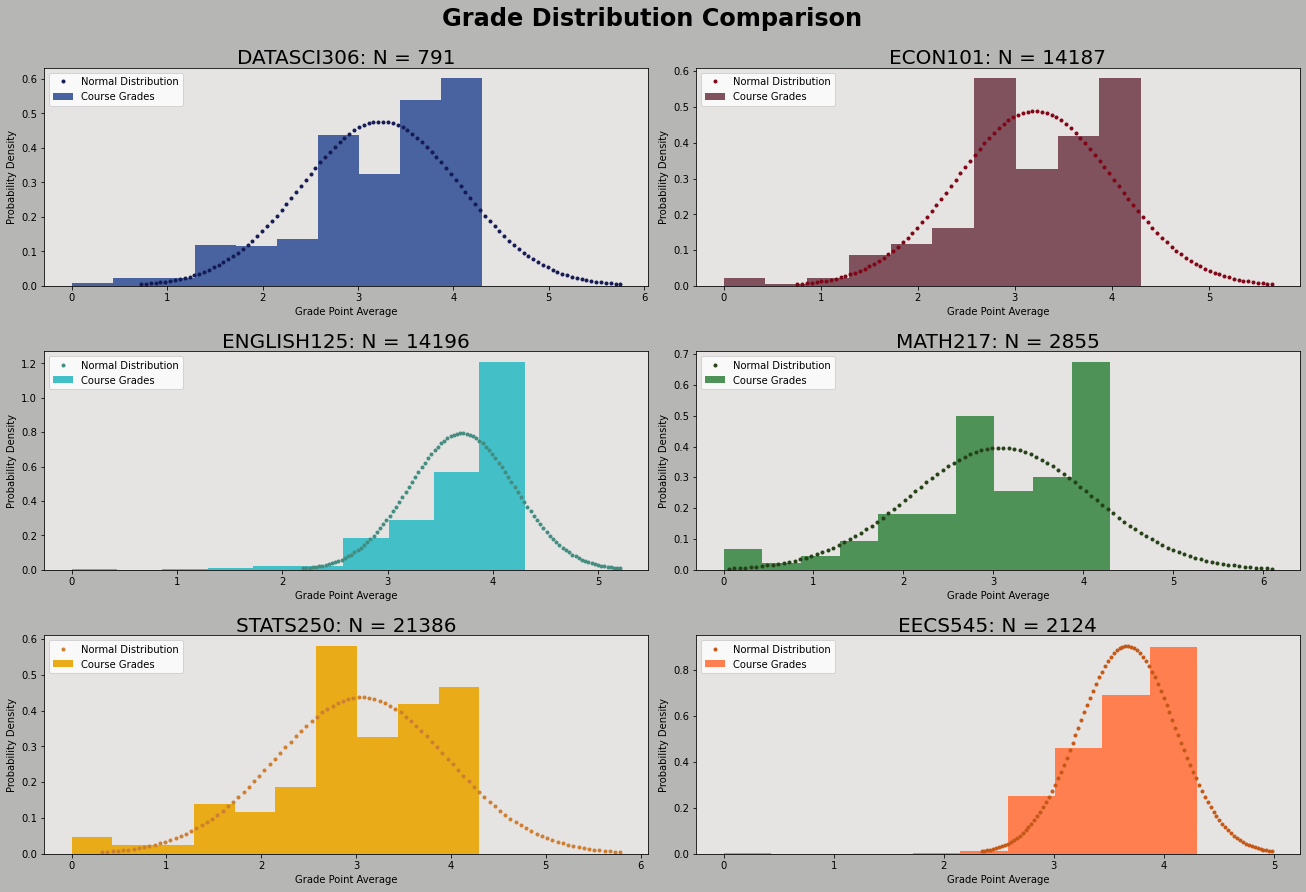

In [4]:
grade_distribution()

In [5]:
def grade_normality():

    class_scores = pd.read_csv('assets/class_grades.csv')

    grades = pd.DataFrame.from_dict({'grade':['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','E'], 'gpa':[4.3,4,3.7,3.3,3,2.7,2.3,2,1.7,1.3,1,0.7,0]})

    def course(column):
        course = pd.merge(class_scores, grades, how = 'left', left_on = class_scores['{}'.format(column)], right_on = grades['grade'])
        course.drop(['grade'], axis=1, inplace = True)
        course = course[['{}'.format(column),'gpa']]
        course.dropna(inplace = True)
        return course

    DATASCI306 = course('DATASCI306_grade')
    ECON101  = course('ECON101_grade')
    ENGLISH125 = course('ENGLISH125_grade')
    MATH217 = course('MATH217_grade')
    STATS250 = course('STATS250_grade')
    EECS545 = course('EECS545_grade')

    def mean_std(df):
        std = df['gpa'].std()
        mean = df['gpa'].mean()
        n = len(df['gpa'])
        return std, mean, n

    DATASCI306_STD, DATASCI306_MEAN, DATASCI306_N = mean_std(DATASCI306)
    ECON101_STD, ECON101_MEAN, ECON101_N = mean_std(ECON101)
    ENGLISH125_STD, ENGLISH125_MEAN, ENGLISH125_N = mean_std(ENGLISH125)
    MATH217_STD, MATH217_MEAN, MATH217_N = mean_std(MATH217)
    STATS250_STD, STATS250_MEAN, STATS250_N = mean_std(STATS250)
    EECS545_STD, EECS545_MEAN, EECS545_N = mean_std(EECS545)

    fig, axs = plt.subplots(3,2,figsize=(16,20))
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=.8, wspace=0.08, hspace=.45)
    fig.patch.set_facecolor('#D8D8D8')
    font = {'fontsize': 20,
            'fontweight' : 100,
            'verticalalignment': 'center'}

    font2 = {'fontsize': 14,
            'fontweight' : 100,
            'verticalalignment': 'center'}

    circle_rad = 15  # This is the radius, in points

    stats.probplot(DATASCI306['gpa'], dist=stats.norm, plot=axs[0,0], fit = True);
    slopea, intercepta= stats.probplot(DATASCI306['gpa'], dist=stats.norm, plot=axs[0,0], fit = True)
    xa =slopea[0]
    ya = (intercepta[0]*xa)+intercepta[1] +2*DATASCI306_STD
    yan = (intercepta[0]*xa)+intercepta[1] +2*-DATASCI306_STD
    axs[0,0].plot(xa, ya, '-.', color = 'grey')
    axs[0,0].plot(xa, yan,'-.', color = 'grey')
    axs[0,0].set_facecolor('#C0C0C0') 
    axs[0,0].fill_between(xa, ya, yan, color = '#DCDCDC')
    axs[0,0].set_title('{}: N = {}'.format('DATASCI306', DATASCI306_N), fontdict = font)
    axs[0,0].text(-.8, 5, '$\sigma=%.2f$2', fontdict = font2)
    axs[0,0].text(-.05, 1.2, '$\sigma=%.2f$-2', fontdict = font2)

    stats.probplot(ECON101['gpa'], dist=stats.norm, plot=axs[0,1], fit = True);
    slopeb, interceptb= stats.probplot(ECON101['gpa'], dist=stats.norm, plot=axs[0,1], fit = True)
    xb =slopeb[0]
    yb = (interceptb[0]*xb)+interceptb[1] +2*ECON101_STD
    ybn = (interceptb[0]*xb)+interceptb[1] +2*-ECON101_STD
    axs[0,1].plot(xb, yb, '-.', color = 'grey')
    axs[0,1].plot(xb, ybn,'-.', color = 'grey')
    axs[0,1].set_facecolor('#C0C0C0') 
    axs[0,1].fill_between(xb, yb, ybn, color = '#DCDCDC')
    axs[0,1].set_title('{}: N = {}'.format('ECON101', ECON101_N), fontdict = font)
    axs[0,1].text(-.9, 5, '$\sigma=%.2f$2', fontdict = font2)
    axs[0,1].text(0.55, 1.5, '$\sigma=%.2f$-2', fontdict = font2)
    axs[0,1].plot(3.7, 4.3, 'o', ms=circle_rad * 1.85, mec='red', mfc='none', mew=2)
    axs[0,1].annotate("""Grades fallinng 
    2$\sigma%.2f$ away""", xy=(3.5, 4.3), xytext=(-100,-130),
                textcoords='offset points',
                color='b', size='large',
                arrowprops=dict(
                    arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                    facecolor='black', shrinkB=circle_rad * 1.2)
    )

    stats.probplot(ENGLISH125['gpa'], dist=stats.norm, plot=axs[1,0], fit = True);
    slopec, interceptc= stats.probplot(ENGLISH125['gpa'], dist=stats.norm, plot=axs[1,0], fit = True)
    xc =slopec[0]
    yc = (interceptc[0]*xc)+interceptc[1] +2*ENGLISH125_STD
    ycn = (interceptc[0]*xc)+interceptc[1] +2*-ENGLISH125_STD
    axs[1,0].plot(xc, yc, '-.', color = 'grey')
    axs[1,0].plot(xc, ycn,'-.', color = 'grey')
    axs[1,0].set_facecolor('#C0C0C0') 
    axs[1,0].fill_between(xc, yc, ycn, color = '#DCDCDC')
    axs[1,0].set_title('{}: N = {}'.format('ENGLISH125', ENGLISH125_N), fontdict = font)
    axs[1,0].text(-.8, 5, '$\sigma=%.2f$2', fontdict = font2)
    axs[1,0].text(-.05, 2.5, '$\sigma=%.2f$-2', fontdict = font2)
    axs[1,0].plot(3.9, 4.3, 'o', ms=circle_rad * 1, mec='red', mfc='none', mew=2)
    axs[1,0].plot(-3, 0.4, 'o', ms=circle_rad * 7, mec='red', mfc='none', mew=2)
    axs[1,0].plot(-2.3, 1.65, 'o', ms=circle_rad * 1, mec='red', mfc='none', mew=2)
    axs[1,0].annotate("""Grades fallinng 
    2$\sigma%.2f$ away""", xy=(4, 4.3), xytext=(-100,-100),
                textcoords='offset points',
                color='b', size='large',
                arrowprops=dict(
                    arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                    facecolor='black', shrinkB=circle_rad * 1.2)
    )
    axs[1,0].annotate('', xy=(-3.15, 0), xytext=(250,70),
                textcoords='offset points',
                color='b', size='large',
                arrowprops=dict(
                    arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                    facecolor='black', shrinkB=circle_rad * 1.2)
    )

    stats.probplot(MATH217['gpa'], dist=stats.norm, plot=axs[1,1], fit = True);
    sloped, interceptd= stats.probplot(MATH217['gpa'], dist=stats.norm, plot=axs[1,1], fit = True)
    xd =sloped[0]
    yd = (interceptd[0]*xd)+interceptd[1] +2*MATH217_STD
    ydn = (interceptd[0]*xd)+interceptd[1] +2*-MATH217_STD
    axs[1,1].plot(xd, yd, '-.', color = 'grey')
    axs[1,1].plot(xd, ydn,'-.', color = 'grey')
    axs[1,1].set_facecolor('#C0C0C0') 
    axs[1,1].fill_between(xd, yd, ydn, color = '#DCDCDC')
    axs[1,1].set_title('{}: N = {}'.format('MATH217', MATH217_N), fontdict = font)
    axs[1,1].text(2, 5, '$\sigma=%.2f$2', fontdict = font2)
    axs[1,1].plot(3.5, 4.3, 'o', ms=circle_rad * 1, mec='red', mfc='none', mew=2)
    axs[1,1].annotate("""Grades fallinng 
    2$\sigma%.2f$ away""", xy=(3.5, 4.3), xytext=(-100,-100),
                textcoords='offset points',
                color='b', size='large',
                arrowprops=dict(
                    arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                    facecolor='black', shrinkB=circle_rad * 1.2)
    )
    axs[1,1].text(.05, 0.75, '$\sigma=%.2f$-2', fontdict = font2)

    stats.probplot(STATS250['gpa'], dist=stats.norm, plot=axs[2,0], fit = True);
    slopee, intercepte= stats.probplot(STATS250['gpa'], dist=stats.norm, plot=axs[2,0], fit = True)
    xe =slopee[0]
    ye = (intercepte[0]*xe)+intercepte[1] +2*STATS250_STD
    yen = (intercepte[0]*xe)+intercepte[1] +2*-STATS250_STD
    axs[2,0].plot(xe, ye, '-.', color = 'grey')
    axs[2,0].plot(xe, yen,'-.', color = 'grey')
    axs[2,0].set_facecolor('#C0C0C0') 
    axs[2,0].fill_between(xe, ye, yen, color = '#DCDCDC')
    axs[2,0].set_title('{}: N = {}'.format('STATS250', STATS250_N), fontdict = font)
    axs[2,0].text(-.8, 5, '$\sigma=%.2f$2', fontdict = font2)
    axs[2,0].text(-.05, 1, '$\sigma=%.2f$-2', fontdict = font2)
    axs[2,0].plot(3.8, 4.3, 'o', ms=circle_rad * 1.75, mec='red', mfc='none', mew=2)
    axs[2,0].annotate("""Grades fallinng 
    2$\sigma%.2f$ away""", xy=(4, 4.3), xytext=(-100,-100),
                textcoords='offset points',
                color='b', size='large',
                arrowprops=dict(
                    arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                    facecolor='black', shrinkB=circle_rad * 1.2)
    )

    stats.probplot(EECS545['gpa'], dist=stats.norm, plot=axs[2,1], fit = True);
    slopef, interceptf= stats.probplot(EECS545['gpa'], dist=stats.norm, plot=axs[2,1], fit = True)
    xf =slopef[0]
    yf = (interceptf[0]*xf)+interceptf[1] +2*EECS545_STD
    yfn = (interceptf[0]*xf)+interceptf[1] +2*-EECS545_STD
    axs[2,1].plot(xf, yf, '-.', color = 'grey')
    axs[2,1].plot(xf, yfn,'-.', color = 'grey')
    axs[2,1].set_facecolor('#C0C0C0') 
    axs[2,1].fill_between(xf, yf, yfn, color = '#DCDCDC')
    axs[2,1].text(-.7, 5, '$\sigma=%.2f$2', fontdict = font2)
    axs[2,1].text(.05, 2.5, '$\sigma=%.2f$-2', fontdict = font2)
    axs[2,1].plot(-3.15, 0.2, 'o', ms=circle_rad * 3.5, mec='red', mfc='none', mew=2)
    axs[2,1].annotate("""Grades fallinng 
    2$\sigma%.2f$ away""", xy=(-3.15, 0), xytext=(50, 30),
                textcoords='offset points',
                color='b', size='large',
                arrowprops=dict(
                    arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                    facecolor='black', shrinkB=circle_rad * 1.2)
    )
    axs[2,1].set_title('{}: N = {}'.format('EECS545', EECS545_N), fontdict = font)

    fig.savefig('qq_grades.png')

    plt.close()
    qqimage = Image.open('qq_grades.png')
    qqimage = qqimage.resize((800, 1000))

    ht = Image.open('assets/heavy_tails.jpeg')

    qqcontactsheet = Image.new('RGB', (1250,800),'#D8D8D8')
    qqcontactsheet.paste(qqimage,(500,-100))
    qqcontactsheet.paste(ht, (10, 250))

    draw = ImageDraw.Draw(qqcontactsheet)
    text = 'Grade Distribution Normality Check'

    qf = ImageFont.truetype('fanwood-webfont.ttf',25)
    qf2 = ImageFont.truetype('fanwood-webfont.ttf',16)
    draw.text((100, 5), text, font = qf, fill = 'black') 
    text2 = """
    The Q-Q plot or quantile-quantile plot, is a tool that will help us assess if a 
    dataset is normally distributed. This is important because many statistical 
    tests assume and require that a dataset is normally distributed, otherwise 
    transformation may be required. The image below shows a Q-Q plot with randomly 
    generateed data, but has more extreme values. Notice how the points fall along 
    the middle of the graph, but curve off at the extremities. Comparing the grade 
    distributions we see that our data has more extreme values. Our grade data is 
    not normally distributed.
        """
    draw.text((10, 50), text2, font = qf2, fill='black', align = 'center')

    return qqcontactsheet

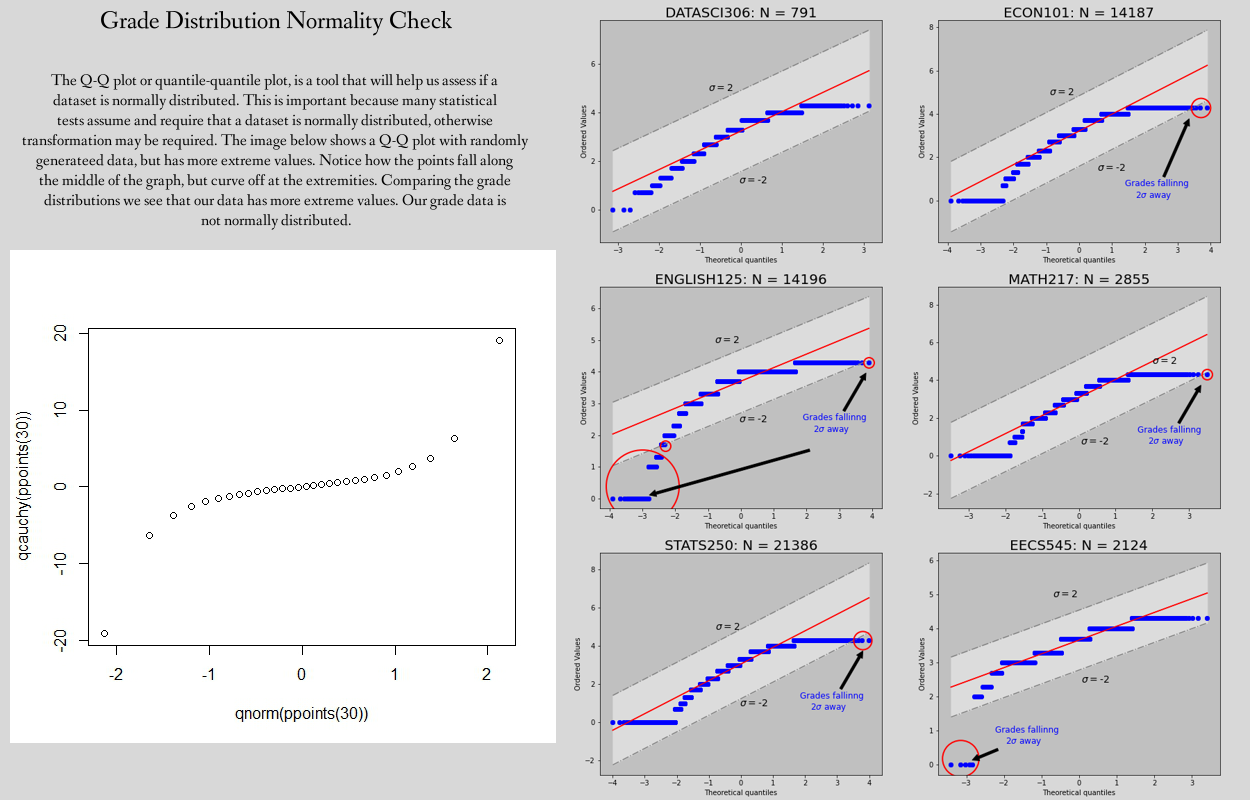

In [6]:
grade_normality()